# Time-Series Forecasting: How To Predict Future Data Using ARMA, ARIMA and SARIMA models.


### References:
 - https://puneet166.medium.com/time-series-forecasting-how-to-predict-future-data-using-arma-arima-and-sarima-model-8bd20597cc7b

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = "https://raw.githubusercontent.com/PinkWink/DataScience/master/data/07.%20portland-oregon-average-monthly-.csv" 
data = pd.read_csv(url, index_col='Month',parse_dates=True)
data.head()

,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [7]:
data.shape

(114, 1)

In [8]:
data.isnull().sum()

Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
 #   Column                                                                                      Non-Null Count  Dtype
---  ------                                                                                      --------------  -----
 0   Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [13]:
data.columns=['avg monthly busride']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   avg monthly busride  114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


<AxesSubplot:xlabel='Month'>

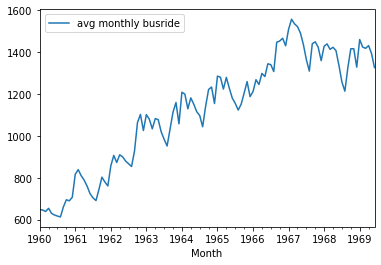

In [17]:
data.plot()

It show clearly , this data follow upward tread with seasonality.

NOTE: By plot vizualization, it seems clear that the data is stationary, however is good practice to confirm using statistics test


### DICKEY-FULLER test

- Ho- Fail to reject null hypothesis . it mean data is stationary.
- H1- Reject the null hypothesis. it mean data is not stationary.

If p value is less than threshold value is 0.5 fail to reject the null hypothesis and it mean data is stationary. \
If p value is more than threshold value 0.5. reject the null hypothesis accept alternative hypothesis.it mean data is not stationary.

In [36]:
def stationary_test(data):
    x=data.dropna() 
    result=adfuller(x)
    print("ADF Stataics ",result[0])
    print("p-value",result[1])
    print("critical values",result[5])
    if result[1]<=0.5:
        print("fail to reject null hypothese h1 , it mean data is stationary")
    else:
        print("Reject the null hypotheise , it mean data is not stationary")

In [37]:
stationary_test(data['avg monthly busride'])

ADF Stataics  -1.5365971444531585
p-value 0.5153358797821741
critical values 1028.4238367341432
Reject the null hypotheise , it mean data is not stationary


### How to convert non stationary data into stationary
- Differencing: 1st difference or 2nd. or 3 rd difference (most popular method).
- logarithm difference.
- etc

In [28]:
# Using 1st difference
data['avg monthly busride first difference'] = data['avg monthly busride'] - data['avg monthly busride'].shift(1)

In [29]:
data

,avg monthly busride,avg monthly busride first difference
Month,,
1960-01-01,648,NaN
1960-02-01,646,-2.0
1960-03-01,639,-7.0
1960-04-01,654,15.0
1960-05-01,630,-24.0
...,...,...
1969-02-01,1425,-36.0
1969-03-01,1419,-6.0
1969-04-01,1432,13.0


<AxesSubplot:xlabel='Month'>

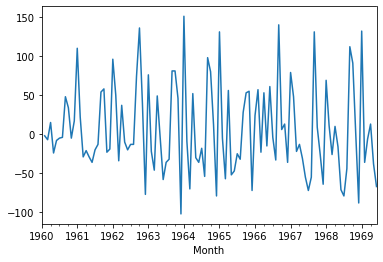

In [30]:
data['avg monthly busride first difference'].plot()

Data seems stationary, lets check with Dickey–Fuller statistics test again

In [38]:
stationary_test(data['avg monthly busride first difference'])

ADF Stataics  -1.9386960651548353
p-value 0.31408183706085435
critical values 1019.5692927050793
fail to reject null hypothese h1 , it mean data is stationary


### Important Note
 - (ACF) Auto correlation function to find **q** value.
 - (PACF) Partially Auto correlation function to find **p** value.

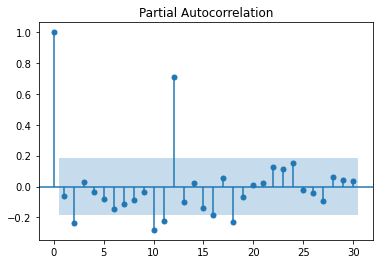

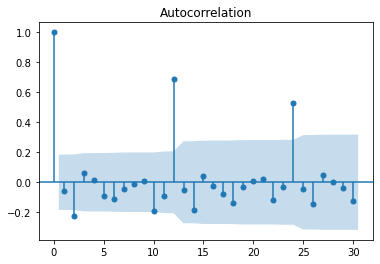

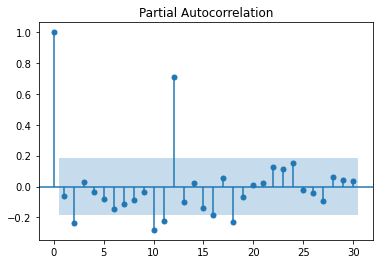

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['avg monthly busride first difference'].iloc[1:],lags=30)
plot_pacf(data['avg monthly busride first difference'].iloc[1:],lags=30)

In [42]:
# For a first ARMA model approach we are going to select p=2 and q=2
from statsmodels.tsa.arima_model import ARMA

model = ARMA(data['avg monthly busride'], order=(2, 2))
model_fit = model.fit()

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
model_fit.summary()

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     avg monthly busride   No. Observations:                  114
Model:                      ARMA(2, 2)   Log Likelihood                -625.388
Method:                        css-mle   S.D. of innovations             56.848
Date:                 Wed, 30 Mar 2022   AIC                           1262.776
Time:                         22:53:16   BIC                           1279.193
Sample:                     01-01-1960   HQIC                          1269.439
                          - 06-01-1969                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1686.6935        nan        nan        nan         nan         nan
ar.L1.avg monthly busride     1.9967      0.002   1200.092      0.000       1.993       2.000
ar.L2.avg monthly busride    -0.9968      0.002   -555.863      0.000      -1.000      -0.993
ma.L1.avg monthly busride    -1.0683      0.123     -8.654      0.000      -1.310      -0.826
ma.L2.avg monthly busride     0.0683      0.124      0.549      0.583      -0.175       0.312
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           -0.0107j            1.0016           -0.0017
AR.2            1.0015           +0.0107j            1.0016            0.0017
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           14.6514           +0.0000j           14.6514            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

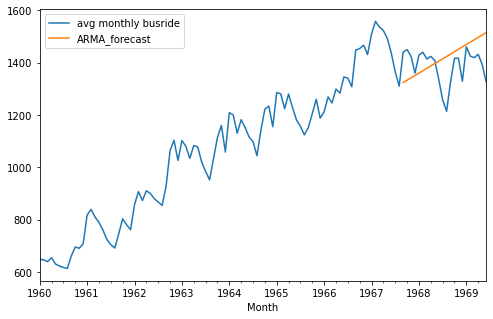

In [44]:
data['ARMA_forecast'] = model_fit.predict(start = 92, end= 114, dynamic= True)  
data[['avg monthly busride', 'ARMA_forecast']].plot(figsize=(8, 5))

Prediction is looking good. but it is not form in seasonal.
We known if data is seasonal then SARIMA is best model for Forecasting.

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

<AxesSubplot:xlabel='Month'>

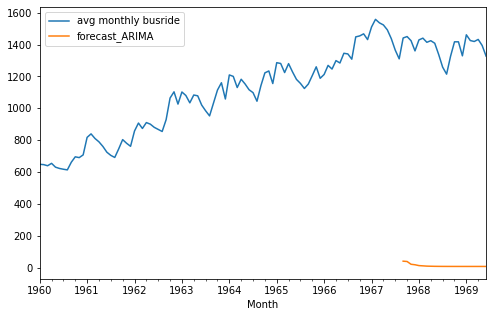

In [47]:
# Lets first check arima model result
# d=1(because we did only one difference to convert non stationary to stationary so we are considering it 1
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(data['avg monthly busride'], order=(2, 1, 2))
model_fit1 = model1.fit()
data['forecast_ARIMA'] = model_fit1.predict(start = 92, end = 114, dynamic = True)  
data[['avg monthly busride', 'forecast_ARIMA']].plot(figsize=(8, 5))

In [50]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.avg monthly busride   No. Observations:                  113
Model:                    ARIMA(2, 1, 2)   Log Likelihood                -611.903
Method:                          css-mle   S.D. of innovations             54.314
Date:                   Wed, 30 Mar 2022   AIC                           1235.807
Time:                           22:57:03   BIC                           1252.171
Sample:                       02-01-1960   HQIC                          1242.447
                            - 06-01-1969                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.7323      2.247      2.996      0.003       2.328      11.137
ar.L1.D.avg monthly busride     0.1449      0.274      0.530      0.596      -0.391       0.681
ar.L2.D.avg monthly busride     0.2776      0.238      1.167      0.243      -0.188       0.744
ma.L1.D.avg monthly busride    -0.2315      0.244     -0.949      0.343      -0.710       0.247
ma.L2.D.avg monthly busride    -0.5258      0.223     -2.355      0.019      -0.963      -0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6548           +0.0000j            1.6548            0.0000
AR.2           -2.1768           +0.0000j            2.1768            0.5000
MA.1            1.1764           +0.0000j            1.1764            0.0000
MA.2           -1.6167           +0.0000j            1.6167            0.5000
-----------------------------------------------------------------------------
"""

In [56]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(data['avg monthly busride'],order=(2,1,2),seasonal_order=(2,1,2,6))
result =model.fit()

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\

SARIMA on same orders(2,1,2) like ARIMA. \
Seasonal_order(2,1,2,6) because it’s analog version of ARIMA’S p,d,q.but here P,D,Q represent seasonal order. \
6 is seasonal factor. which is the no of periods in a year seasonality repeated.

<AxesSubplot:xlabel='Month'>

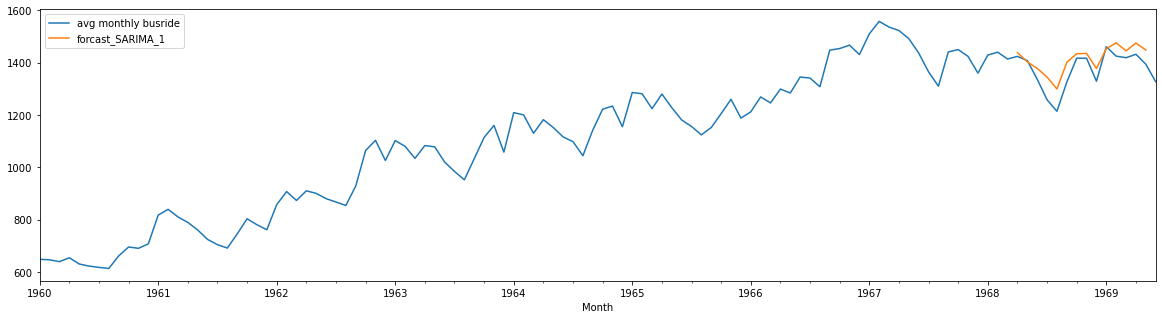

In [57]:
data['forcast_SARIMA_1']=result.predict(start=99, end=112, dynamic=True)
data[['avg monthly busride','forcast_SARIMA_1']].plot(figsize=(20, 5))